In [1]:
!pip install yfinance 


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# The new stocks we'll use for this analysis
tech_list = ['TSLA', 'NFLX', 'NVDA', 'META']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Downloading stock data for each company
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Adding a column to identify the company
company_name_mapping = {
    'TSLA': 'TESLA',
    'NFLX': 'NETFLIX',
    'NVDA': 'NVIDIA',
    'META': 'FACEBOOK'
}

for stock, data in company_data.items():
    data["company_name"] = company_name_mapping[stock]

# Concatenating all the data into a single DataFrame
df = pd.concat(company_data.values(), axis=0)

# Creating individual DataFrames for each company for direct access
TSLA = company_data['TSLA']
NFLX = company_data['NFLX']
NVDA = company_data['NVDA']
META = company_data['META']
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
TSLA.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,230.614961,235.587103,225.492976,230.580715,9.483414e+07
std,70.989891,73.203948,68.410065,71.064782,3.332845e+07
min,142.050003,144.440002,138.800003,140.559998,3.716760e+07
25%,180.004997,184.504997,176.980000,181.950001,7.177158e+07
50%,210.695000,216.005005,207.654999,212.070000,8.715945e+07
75%,248.619999,251.972496,242.507504,247.590004,1.101130e+08
max,479.859985,488.540009,457.510010,475.899994,2.438697e+08


In [4]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TSLA)     252 non-null    float64
 1   (High, TSLA)      252 non-null    float64
 2   (Low, TSLA)       252 non-null    float64
 3   (Open, TSLA)      252 non-null    float64
 4   (Volume, TSLA)    252 non-null    int64  
 5   (company_name, )  252 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.8+ KB


<Figure size 1000x600 with 0 Axes>

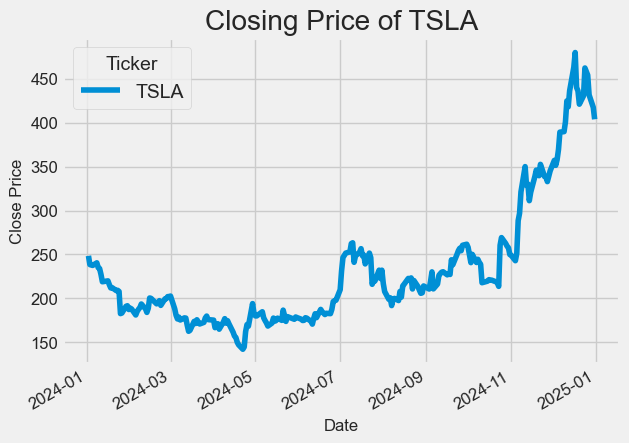

<Figure size 1000x600 with 0 Axes>

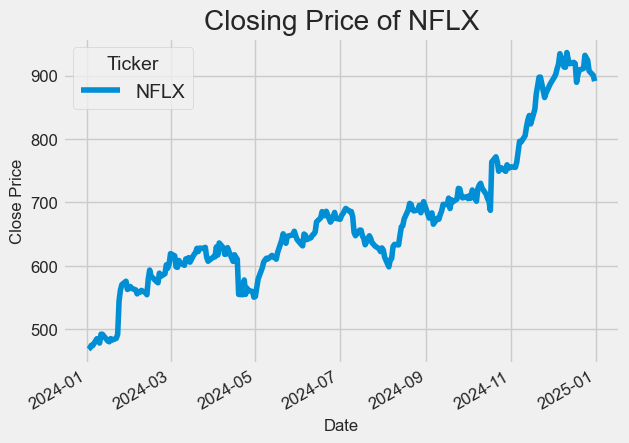

<Figure size 1000x600 with 0 Axes>

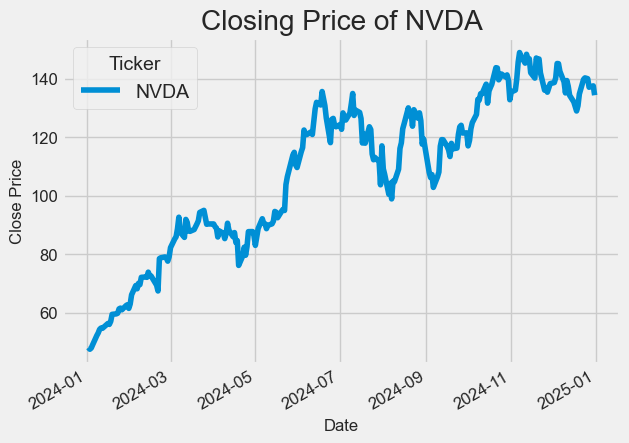

<Figure size 1000x600 with 0 Axes>

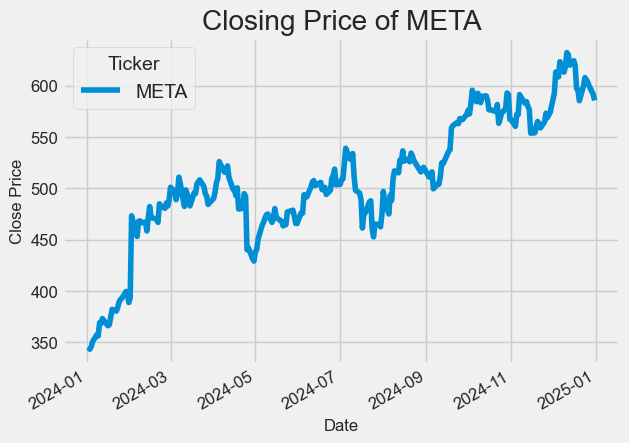

In [5]:
for stock in tech_list:
    plt.figure(figsize=(10, 6))
    company_data[stock]['Close'].plot(title=f"Closing Price of {stock}", fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True)
    plt.show()


<Figure size 1000x600 with 0 Axes>

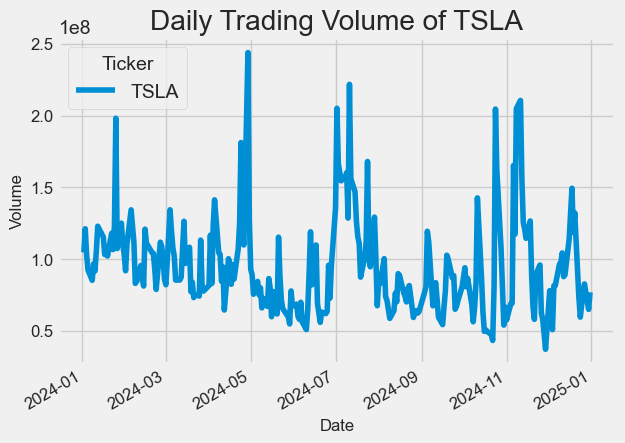

<Figure size 1000x600 with 0 Axes>

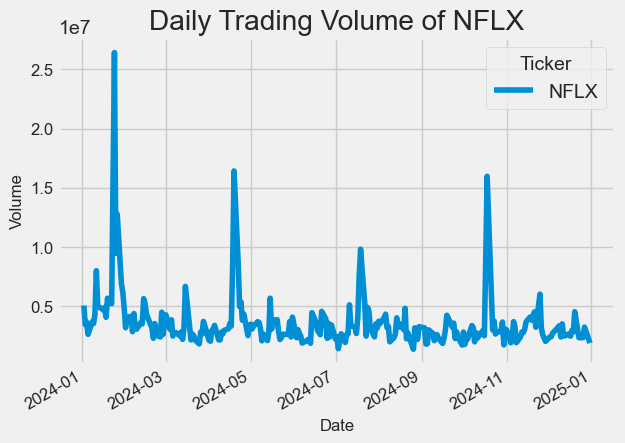

<Figure size 1000x600 with 0 Axes>

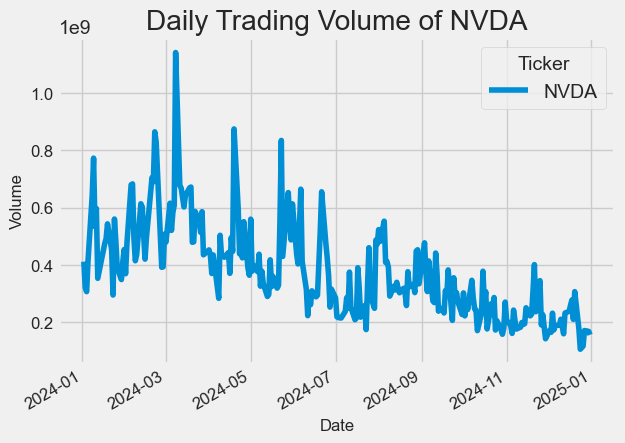

<Figure size 1000x600 with 0 Axes>

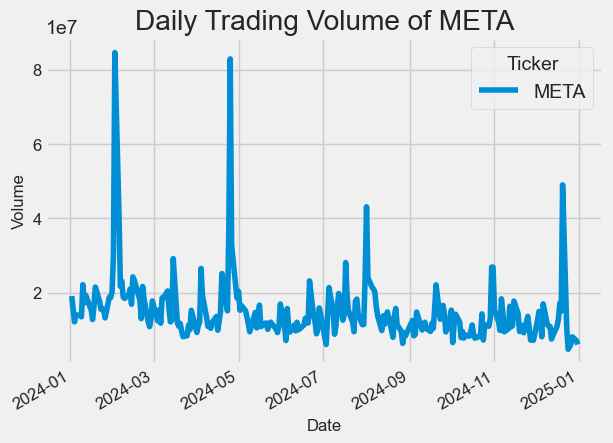

In [6]:
for stock in tech_list:
    plt.figure(figsize=(10, 6))
    company_data[stock]['Volume'].plot(title=f"Daily Trading Volume of {stock}", fontsize=12)
    plt.ylabel('Volume', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True)
    plt.show()


<Figure size 1000x600 with 0 Axes>

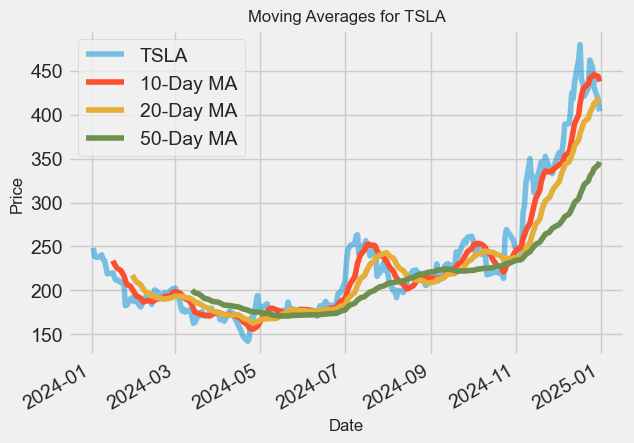

<Figure size 1000x600 with 0 Axes>

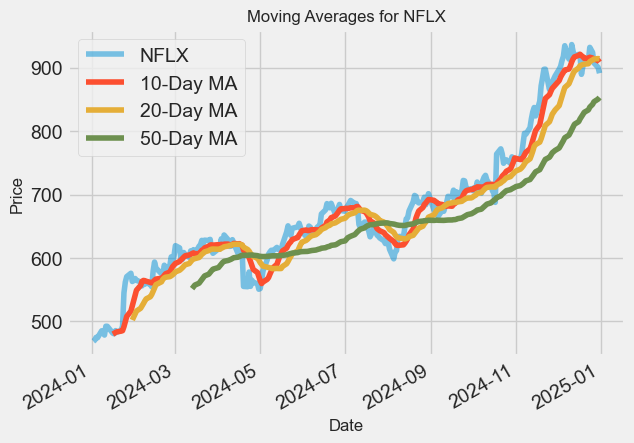

<Figure size 1000x600 with 0 Axes>

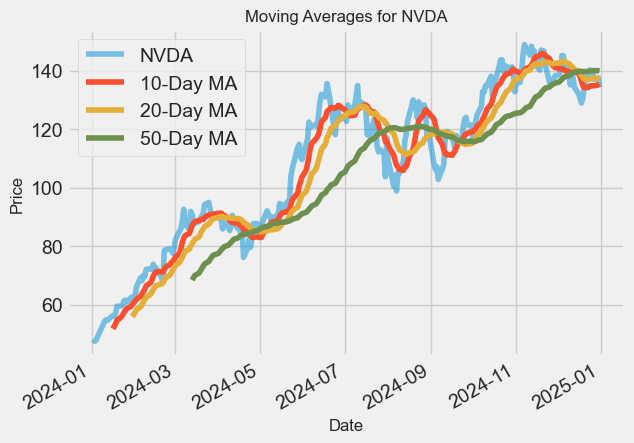

<Figure size 1000x600 with 0 Axes>

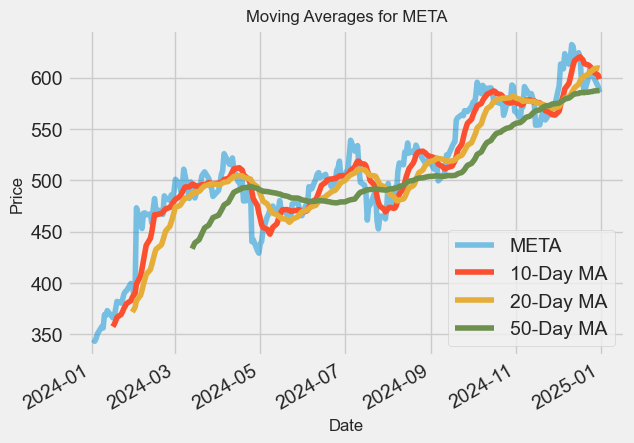

In [7]:
moving_avg_periods = [10, 20, 50]  # Moving averages over 10, 20, and 50 days

for stock in tech_list:
    plt.figure(figsize=(10, 6))
    data = company_data[stock]
    data['Close'].plot(label='Close Price', alpha=0.5)

    for period in moving_avg_periods:
        data[f'MA_{period}'] = data['Close'].rolling(window=period).mean()
        data[f'MA_{period}'].plot(label=f'{period}-Day MA')

    plt.title(f"Moving Averages for {stock}", fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


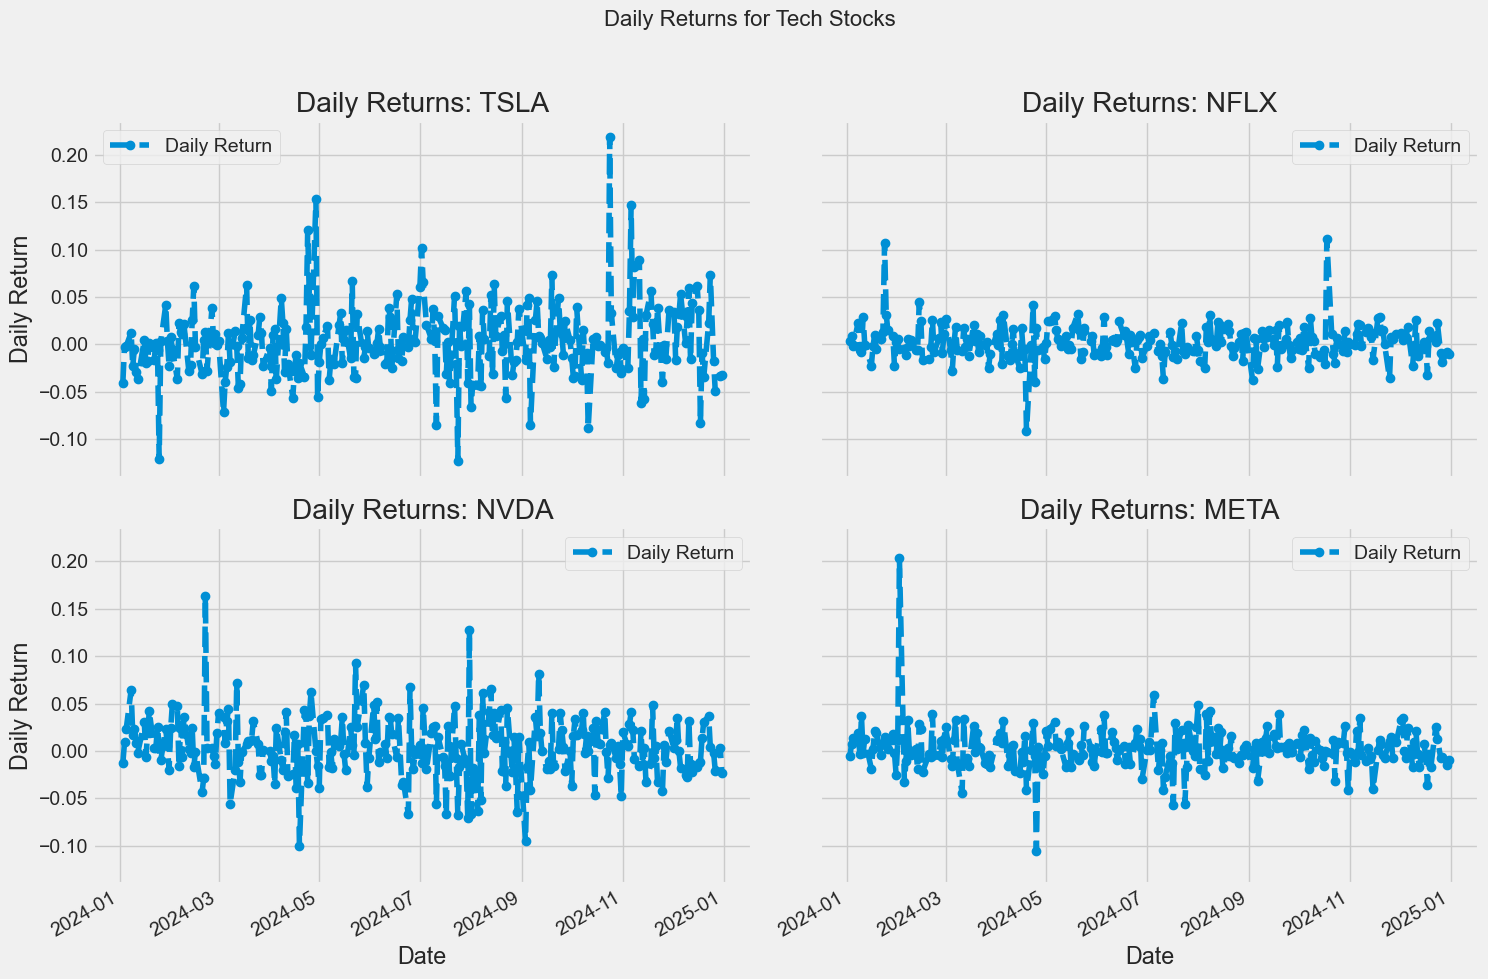

In [8]:
# Calculating and plotting daily returns for each stock in a grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Daily Returns for Tech Stocks", fontsize=16)

for i, stock in enumerate(tech_list):
    row, col = divmod(i, 2)
    company_data[stock]['Daily Return'] = company_data[stock]['Close'].pct_change()
    company_data[stock]['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o', title=f"Daily Returns: {stock}")

for ax in axes.flat:
    ax.set_ylabel('Daily Return')
    ax.set_xlabel('Date')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

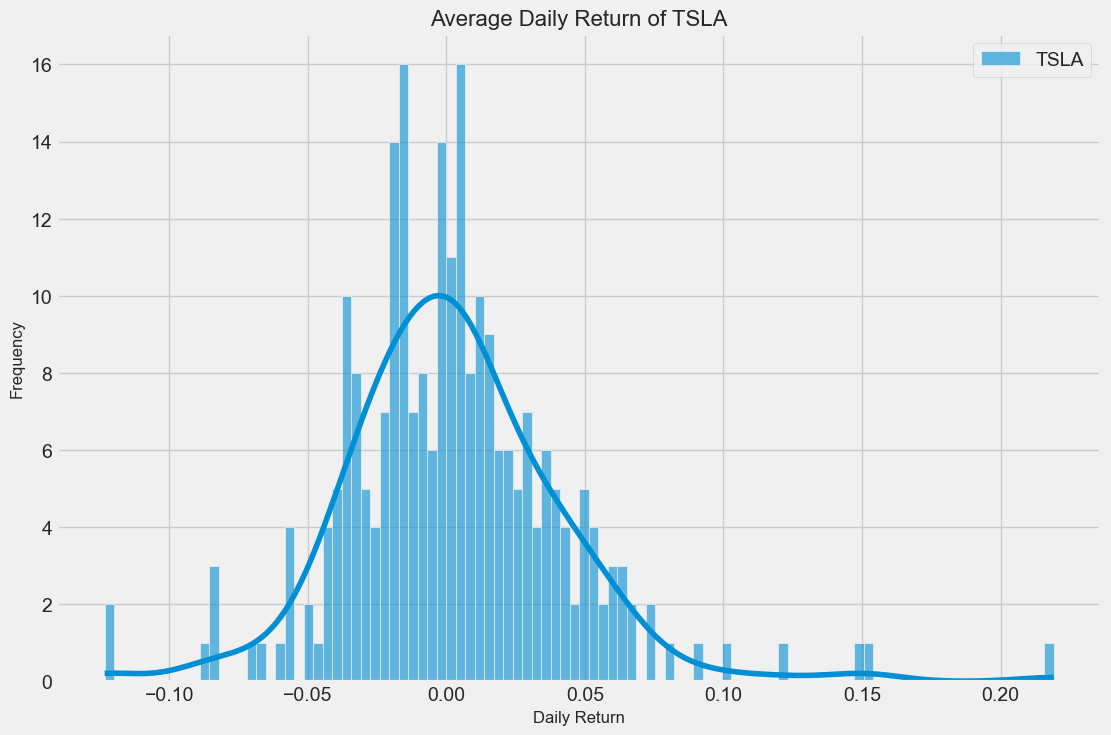

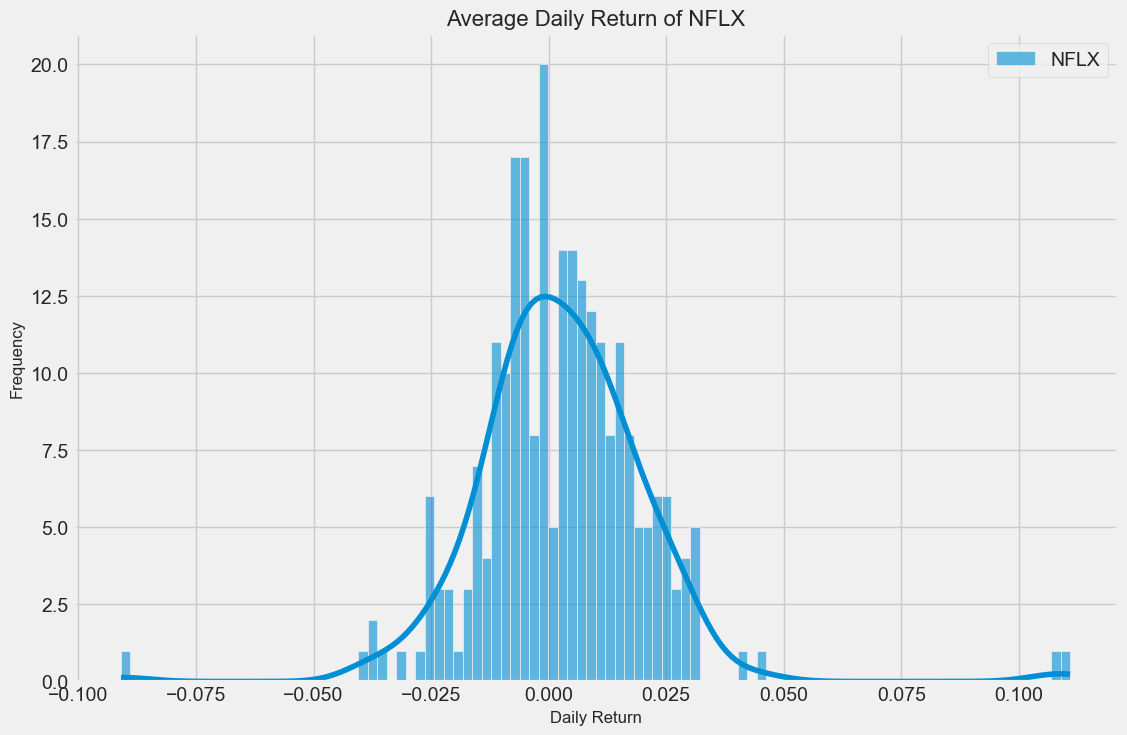

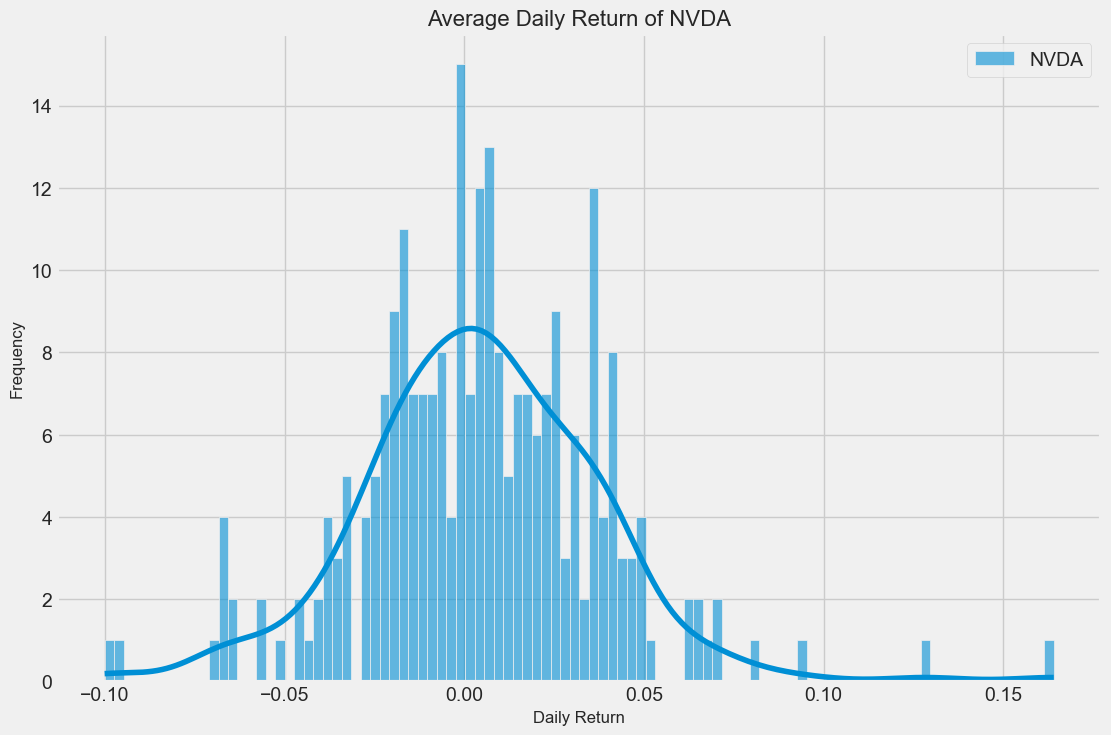

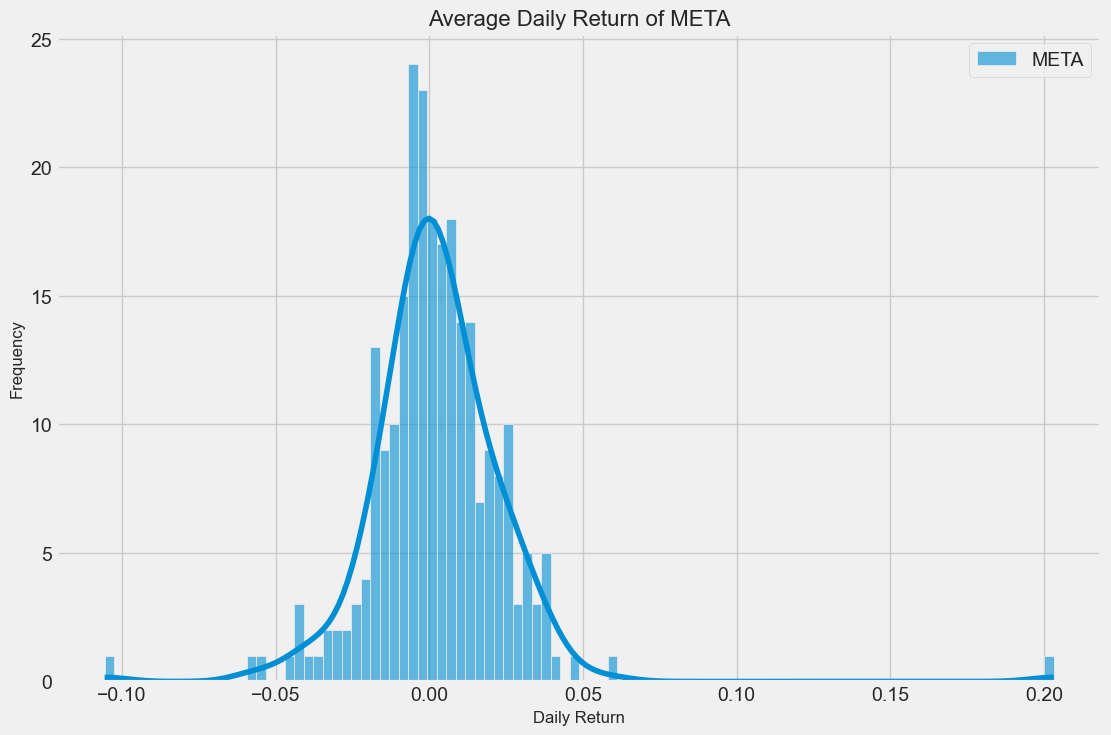

In [9]:
# Plotting the average daily return using a histogram and kde plot for each stock individually
for stock in tech_list:
    plt.figure(figsize=(12, 8))
    sns.histplot(company_data[stock]['Daily Return'].dropna(), bins=100, kde=True, label=stock, alpha=0.6)
    plt.title(f'Average Daily Return of {stock}', fontsize=16)
    plt.xlabel('Daily Return', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
print(tech_rets.head())

[*********************100%***********************]  4 of 4 completed

Ticker          META      NFLX      NVDA      TSLA
Date                                              
2024-01-02       NaN       NaN       NaN       NaN
2024-01-03 -0.005256  0.003757 -0.012436 -0.040134
2024-01-04  0.007693  0.009378  0.009018 -0.002181
2024-01-05  0.013914 -0.001285  0.022897 -0.001849
2024-01-08  0.019065  0.023141  0.064281  0.012464


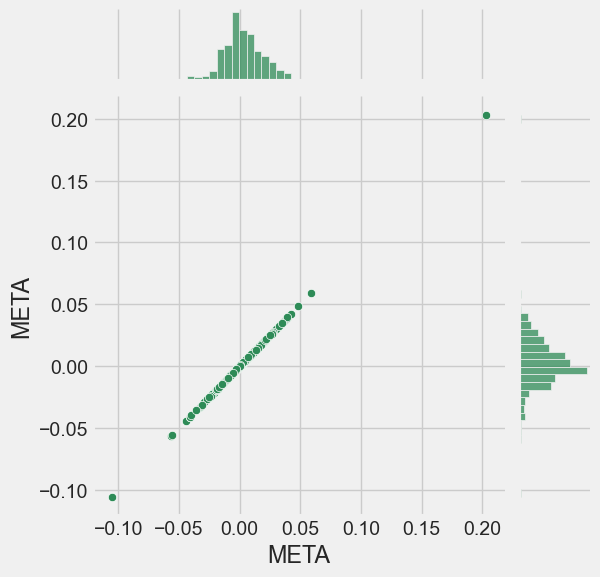

In [11]:
sns.jointplot(x='META', y='META', data=tech_rets, kind='scatter', color='seagreen')

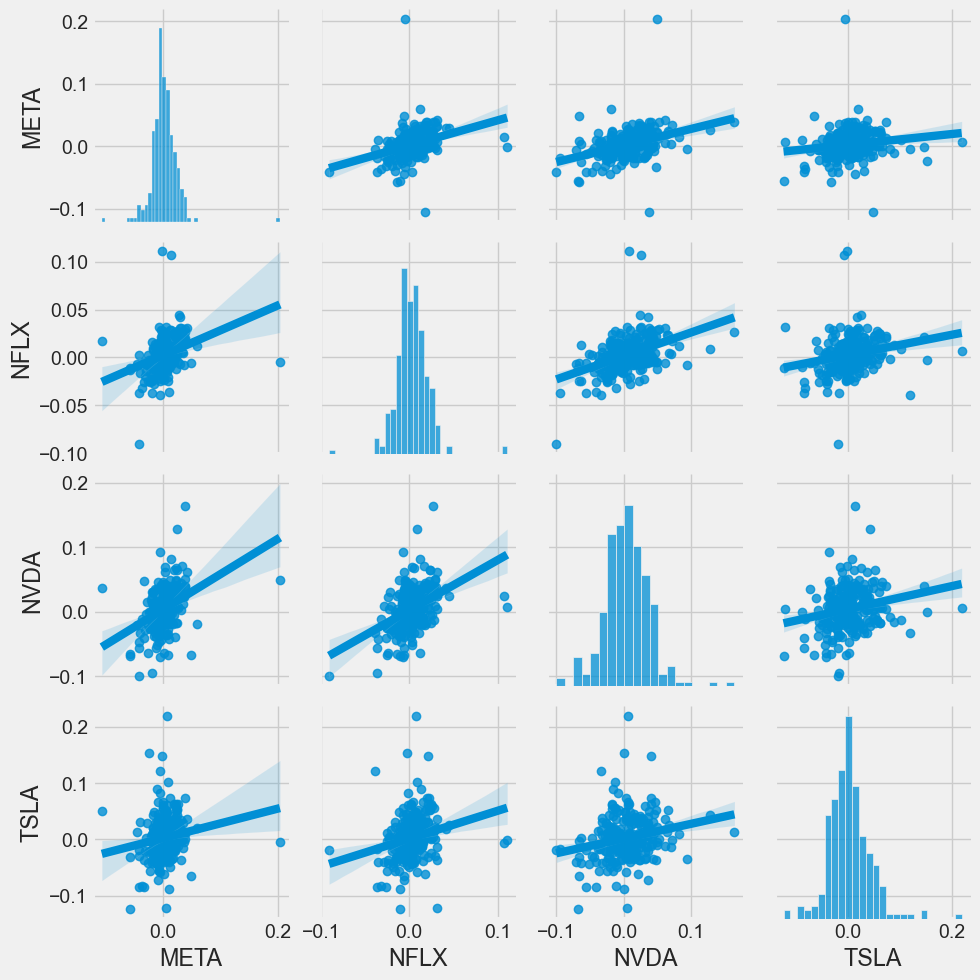

In [12]:
# Pairplot of the tech returns DataFrame
sns.pairplot(tech_rets, kind='reg')
plt.show()


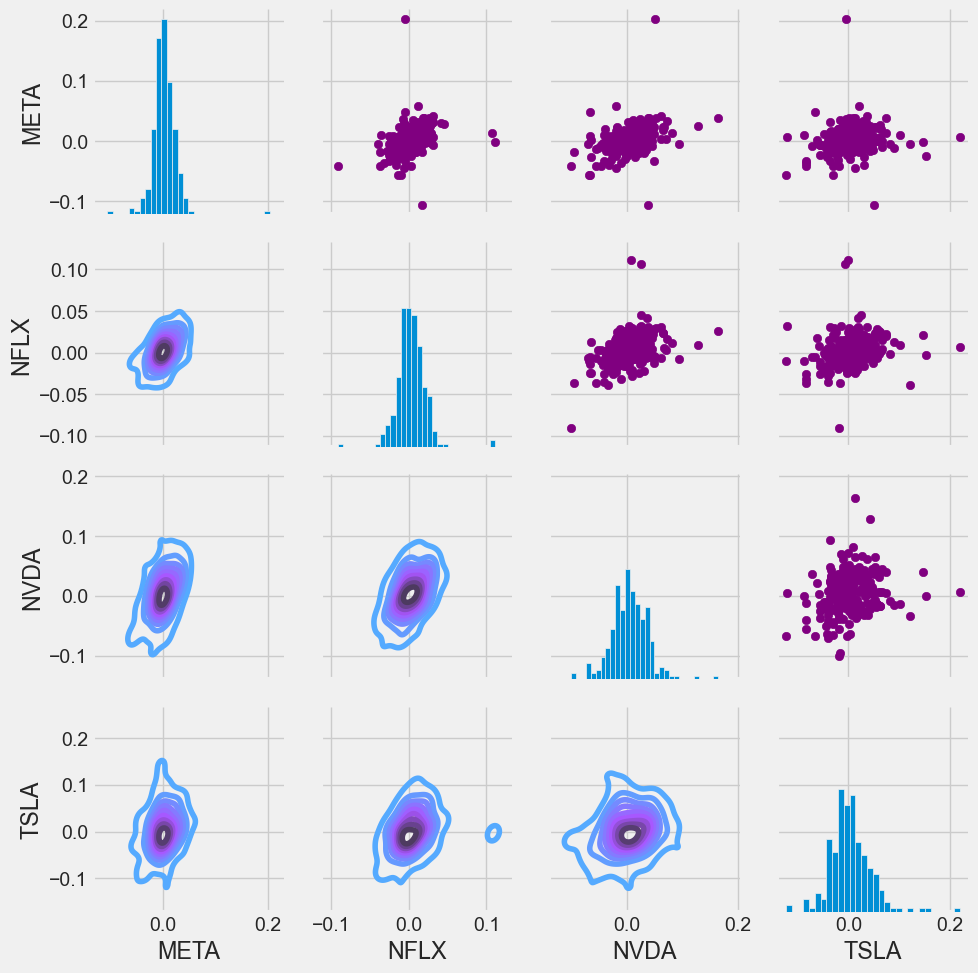

In [13]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

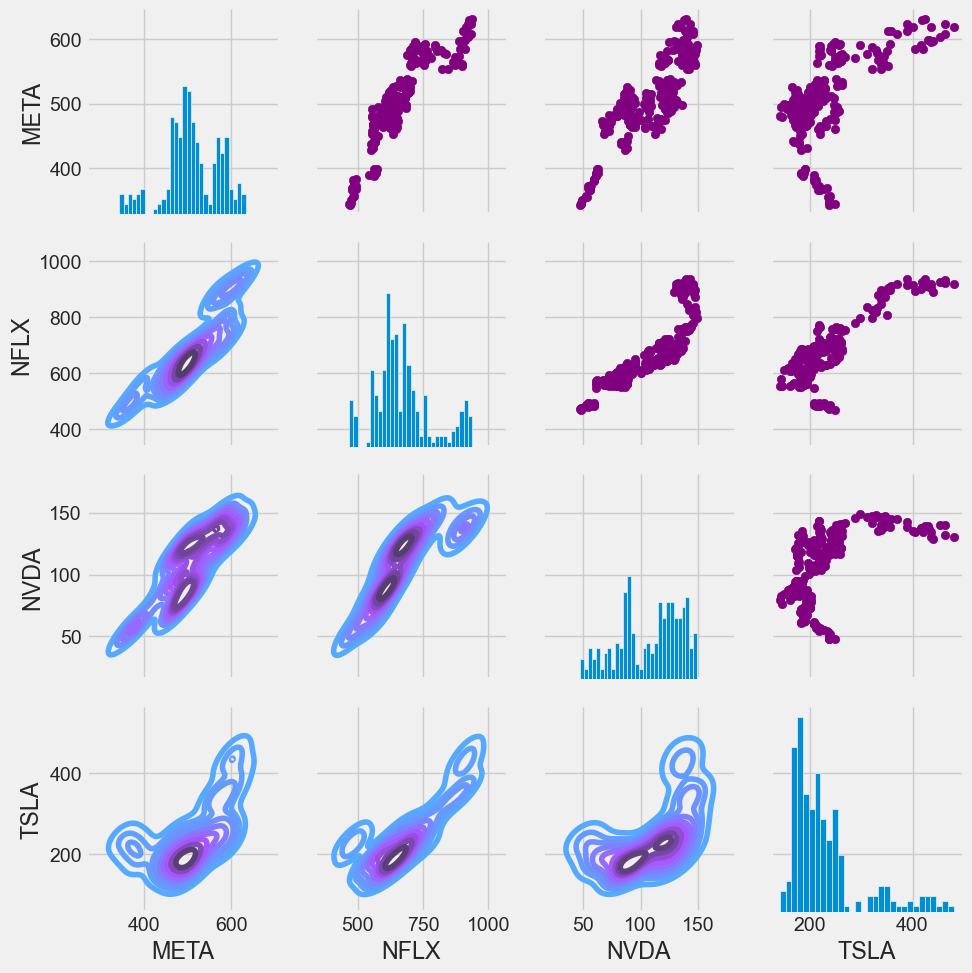

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

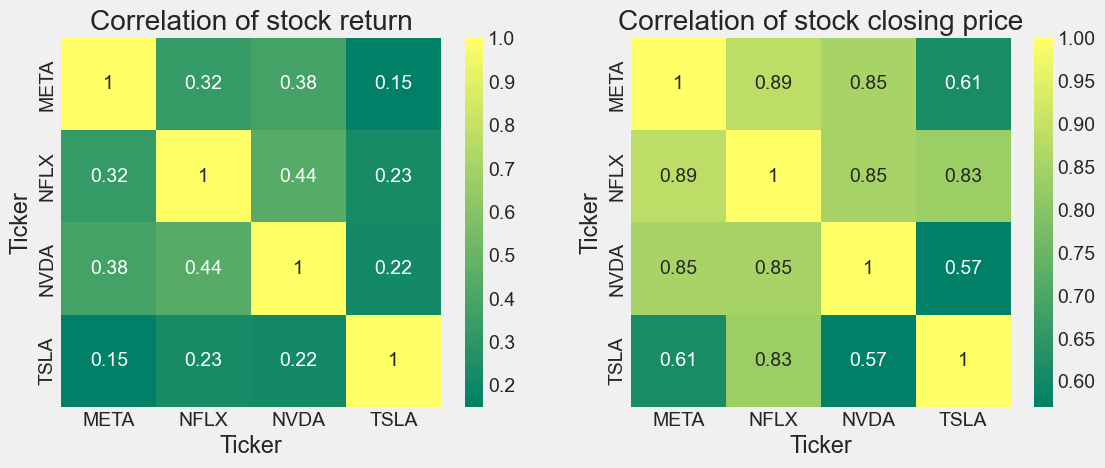

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

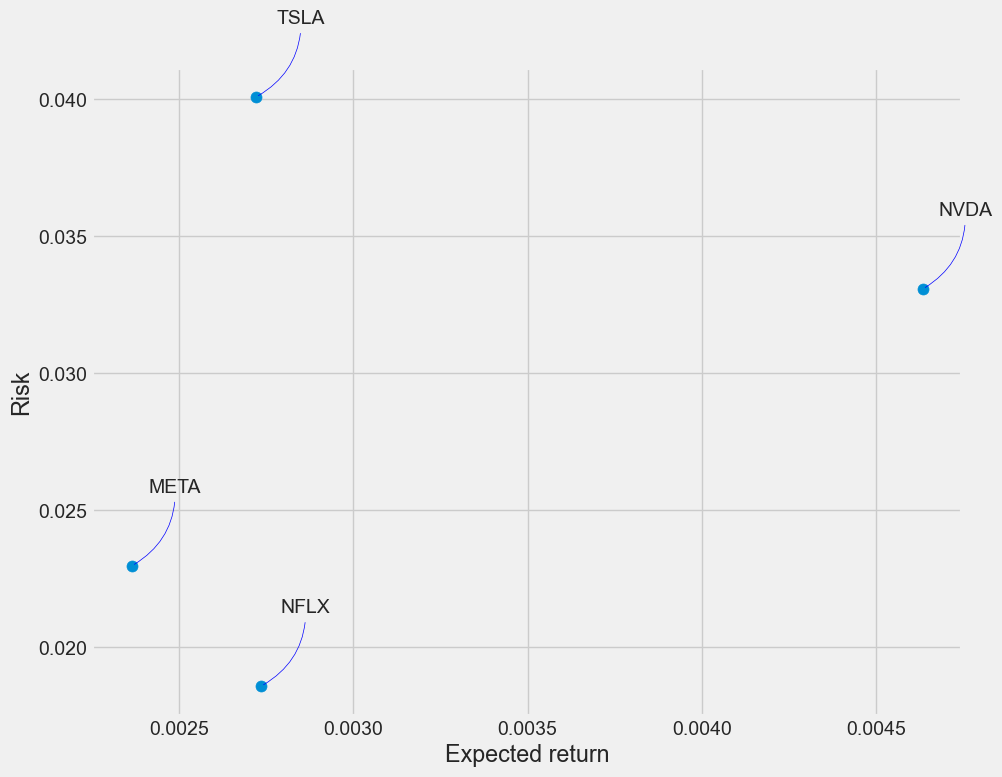

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [185]:

# Get the stock quote
df = yf.download('NVDA', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2012-01-03,0.321897,0.330151,0.321209,0.327858,468044000
2012-01-04,0.325565,0.326941,0.319146,0.322126,347372000
2012-01-05,0.337258,0.338863,0.322585,0.323960,563548000
2012-01-06,0.333361,0.337258,0.329463,0.337029,533252000
2012-01-09,0.333361,0.339780,0.331068,0.333590,508244000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600


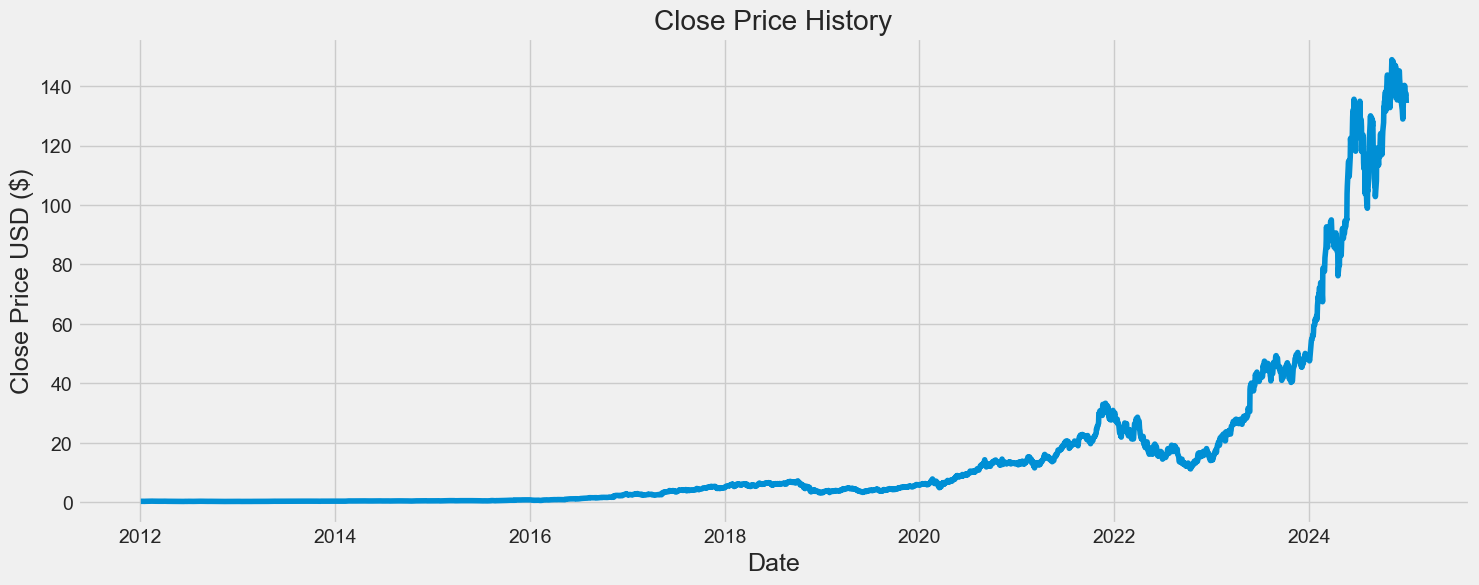

In [186]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

##### !pip install optree
!pip install tensorflow

In [20]:
pip install typing_extensions==4.7.1 --upgrade

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



In [188]:
# Preparing the data for LSTM model
NVDA_data = NVDA[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(NVDA_data)

In [189]:

# Creating a data structure with 60 time-steps and 1 output
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [225]:
from keras import optimizers
# Reshaping the data to be accepted by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
Rmsprop = optimizers.RMSprop(learning_rate=0.5)




C:\Users\C_ZENGIN1\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [231]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [232]:
# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=30)

# Creating the testing data set
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = NVDA_data[train_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0025
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0029
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0022
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0020
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0019
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0019
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0020
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0023
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0021
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0018
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0019
Epoch 15/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


C:\Users\C_ZENGIN1\AppData\Local\Temp\ipykernel_11848\3272247099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


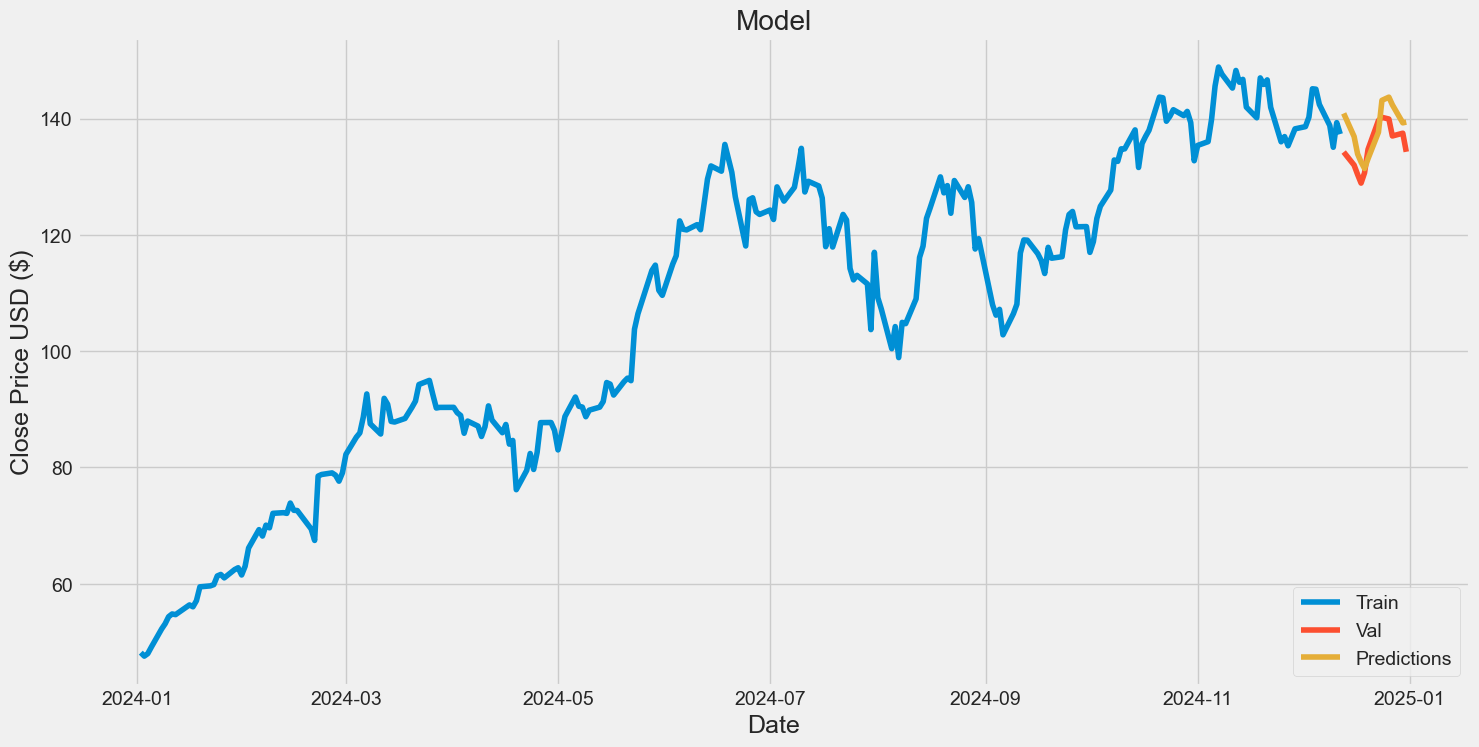

In [233]:
# Reshaping the data to be accepted by LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Getting the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plotting the data
train = NVDA_data[:train_data_len]
valid = NVDA_data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [234]:
valid
    

Price,Close,Predictions
Ticker,NVDA,
Date,,
2024-12-13,134.250000,140.894882
2024-12-16,132.000000,136.912842
2024-12-17,130.389999,133.920975
2024-12-18,128.910004,132.529205
2024-12-19,130.679993,131.410782
2024-12-20,134.699997,133.101471
2024-12-23,139.669998,137.658615
2024-12-24,140.220001,143.139481


In [236]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


# Calculate the performance of the model
mse = mean_squared_error(valid['Close'], valid['Predictions'])
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Squared Error: 15.14
Mean Absolute Error: 3.50
Root Mean Squared Error: 3.89
